In [ ]:
!pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/cu121/repo.html
     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/467.5 MB 112.7 MB/s eta 0:00:04

In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import random

import numpy as np
import torch
from scipy.spatial.transform import Rotation


def bounding_box_uvgrid(inp: torch.Tensor):
    pts = inp[..., :3].reshape((-1, 3))
    mask = inp[..., 6].reshape(-1)
    point_indices_inside_faces = mask == 1
    pts = pts[point_indices_inside_faces, :]
    return bounding_box_pointcloud(pts)


def bounding_box_pointcloud(pts: torch.Tensor):
    x = pts[:, 0]
    y = pts[:, 1]
    z = pts[:, 2]
    box = [[x.min(), y.min(), z.min()], [x.max(), y.max(), z.max()]]
    return torch.tensor(box)


def center_and_scale_uvgrid(inp: torch.Tensor, return_center_scale=False):
    bbox = bounding_box_uvgrid(inp)
    diag = bbox[1] - bbox[0]
    scale = 2.0 / max(diag[0], diag[1], diag[2])
    center = 0.5 * (bbox[0] + bbox[1])
    inp[..., :3] -= center
    inp[..., :3] *= scale
    if return_center_scale:
        return inp, center, scale
    return inp


def get_random_rotation():
    """Get a random rotation in 90 degree increments along the canonical axes"""
    axes = [
        np.array([1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, 0, 1]),
    ]
    angles = [0.0, 90.0, 180.0, 270.0]
    axis = random.choice(axes)
    angle_radians = np.radians(random.choice(angles))
    return Rotation.from_rotvec(angle_radians * axis)


def rotate_uvgrid(inp, rotation):
    """Rotate the node features in the graph by a given rotation"""
    Rmat = torch.tensor(rotation.as_matrix()).float()
    orig_size = inp[..., :3].size()
    inp[..., :3] = torch.mm(inp[..., :3].view(-1, 3), Rmat).view(
        orig_size
    )  # Points
    inp[..., 3:6] = torch.mm(inp[..., 3:6].view(-1, 3), Rmat).view(
        orig_size
    )  # Normals/tangents
    return inp


INVALID_FONTS = [
    "Bokor",
    "Lao Muang Khong",
    "Lao Sans Pro",
    "MS Outlook",
    "Catamaran Black",
    "Dubai",
    "HoloLens MDL2 Assets",
    "Lao Muang Don",
    "Oxanium Medium",
    "Rounded Mplus 1c",
    "Moul Pali",
    "Noto Sans Tamil",
    "Webdings",
    "Armata",
    "Koulen",
    "Yinmar",
    "Ponnala",
    "Noto Sans Tamil",
    "Chenla",
    "Lohit Devanagari",
    "Metal",
    "MS Office Symbol",
    "Cormorant Garamond Medium",
    "Chiller",
    "Give You Glory",
    "Hind Vadodara Light",
    "Libre Barcode 39 Extended",
    "Myanmar Sans Pro",
    "Scheherazade",
    "Segoe MDL2 Assets",
    "Siemreap",
    "Signika SemiBold" "Taprom",
    "Times New Roman TUR",
    "Playfair Display SC Black",
    "Poppins Thin",
    "Raleway Dots",
    "Raleway Thin",
    "Segoe MDL2 Assets",
    "Segoe MDL2 Assets",
    "Spectral SC ExtraLight",
    "Txt",
    "Uchen",
    "Yinmar",
    "Almarai ExtraBold",
    "Fasthand",
    "Exo",
    "Freckle Face",
    "Montserrat Light",
    "Inter",
    "MS Reference Specialty",
    "MS Outlook",
    "Preah Vihear",
    "Sitara",
    "Barkerville Old Face",
    "Bodoni MT" "Bokor",
    "Fasthand",
    "HoloLens MDL2 Assests",
    "Libre Barcode 39",
    "Lohit Tamil",
    "Marlett",
    "MS outlook",
    "MS office Symbol Semilight",
    "MS office symbol regular",
    "Ms office symbol extralight",
    "Ms Reference speciality",
    "Segoe MDL2 Assets",
    "Siemreap",
    "Sitara",
    "Symbol",
    "Wingdings",
    "Metal",
    "Ponnala",
    "Webdings",
    "Souliyo Unicode",
    "Aguafina Script",
    "Yantramanav Black",
    # "Yaldevi",
    # Taprom,
    # "Zhi Mang Xing",
    # "Taviraj",
    # "SeoulNamsan EB",
]


def valid_font(filename):
    for name in INVALID_FONTS:
        if name.lower() in str(filename).lower():
            return False
    return True

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch import FloatTensor
import dgl
from dgl.data.utils import load_graphs
from tqdm import tqdm
from abc import abstractmethod
from torch.nn.utils.rnn import pad_sequence



from torch.utils.data import Dataset, DataLoader
import dgl
from torch import FloatTensor, stack

class BaseDataset(Dataset):
    @staticmethod
    def num_classes():
        pass

    def __init__(self, X_train, Y_train):
        """
        self.data is a list of dictionaries with keys graph and label
        """
        assert len(X_train) == len(Y_train), "The number of graphs must match the number of labels"
        self.data = [{"graph": graph, "label": label} for graph, label in zip(X_train, Y_train)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        return sample["graph"], sample["label"]  # Returns a tuple of the sample graph and its corresponding label

    # def _collate(self, batch):
    #     graphs, labels = zip(*batch)
    #     batched_graph = dgl.batch(graphs)
    #     if any(label.ndim > 1 for label in labels):  # Check if any labels have more than one dimension
    #         # Assuming labels are 2D and you want to pad along the first dimension
    #         padded_labels = pad_sequence([torch.tensor(label, dtype=torch.float32) for label in labels], batch_first=True, padding_value=0)
    #     else:
    #         # Convert labels to tensor directly if they are all the same size or 1D
    #         padded_labels = torch.tensor(labels)
    #     return {"graph": batched_graph, "labels": padded_labels}

    def _collate(self, batch):
        graphs, labels = zip(*batch)
        batched_graph = dgl.batch(graphs)

        # Create a default padding command vector
        pad_vector = torch.tensor([6] + [-1]*16, dtype=torch.float32)

        # Prepare labels with padding
        padded_labels = []
        for label in labels:
            label_length = label.shape[0]
            if label_length < 60:
                # Calculate how many padding vectors are needed
                padding_count = 60 - label_length
                # Create a tensor of padding vectors
                padding = pad_vector.repeat(padding_count, 1)
                # Concatenate the original label with the padding
                padded_label = torch.cat([torch.tensor(label, dtype=torch.float32), padding], dim=0)
            else:
                padded_label = torch.tensor(label, dtype=torch.float32)
            padded_labels.append(padded_label)

        # Stack all the padded labels into a single tensor
        padded_labels = stack(padded_labels)

        return {"graph": batched_graph, "labels": padded_labels}


    def get_dataloader(self, batch_size=128, shuffle=True, num_workers=0):
        return DataLoader(
            self,
            batch_size=batch_size,
            shuffle=shuffle,
            collate_fn=self._collate,
            num_workers=num_workers,  # Can be set to non-zero on Linux
            drop_last=True
        )


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from dgl.nn.pytorch.conv import NNConv
from dgl.nn.pytorch.glob import MaxPooling

# Convolutional Layers

In [ ]:
def _conv1d(in_channels, out_channels, kernel_size=3, padding=0, bias=False):
    """
    Helper function to create a 1D convolutional layer with batchnorm and LeakyReLU activation

    Args:
        in_channels (int): Input channels
        out_channels (int): Output channels
        kernel_size (int, optional): Size of the convolutional kernel. Defaults to 3.
        padding (int, optional): Padding size on each side. Defaults to 0.
        bias (bool, optional): Whether bias is used. Defaults to False.

    Returns:
        nn.Sequential: Sequential contained the Conv1d, BatchNorm1d and LeakyReLU layers
    """
    return nn.Sequential(
        nn.Conv1d(
            in_channels, out_channels, kernel_size=kernel_size, padding=padding, bias=bias
        ),
        nn.BatchNorm1d(out_channels),
        nn.LeakyReLU(),
    )


def _conv2d(in_channels, out_channels, kernel_size, padding=0, bias=False):
    """
    Helper function to create a 2D convolutional layer with batchnorm and LeakyReLU activation

    Args:
        in_channels (int): Input channels
        out_channels (int): Output channels
        kernel_size (int, optional): Size of the convolutional kernel. Defaults to 3.
        padding (int, optional): Padding size on each side. Defaults to 0.
        bias (bool, optional): Whether bias is used. Defaults to False.

    Returns:
        nn.Sequential: Sequential contained the Conv2d, BatchNorm2d and LeakyReLU layers
    """
    return nn.Sequential(
        nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size=kernel_size,
            padding=padding,
            bias=bias,
        ),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(),
    )


def _fc(in_features, out_features, bias=False):
    return nn.Sequential(
        nn.Linear(in_features, out_features, bias=bias),
        nn.BatchNorm1d(out_features),
        nn.LeakyReLU(),
    )

#MLP Modules

In [ ]:
class _MLP(nn.Module):
    """"""

    def __init__(self, num_layers, input_dim, hidden_dim, output_dim):
        """
        MLP with linear output
        Args:
            num_layers (int): The number of linear layers in the MLP
            input_dim (int): Input feature dimension
            hidden_dim (int): Hidden feature dimensions for all hidden layers
            output_dim (int): Output feature dimension

        Raises:
            ValueError: If the given number of layers is <1
        """
        super(_MLP, self).__init__()
        self.linear_or_not = True  # default is linear model
        self.num_layers = num_layers
        self.output_dim = output_dim

        if num_layers < 1:
            raise ValueError("Number of layers should be positive!")
        elif num_layers == 1:
            # Linear model
            self.linear = nn.Linear(input_dim, output_dim)
        else:
            # Multi-layer model
            self.linear_or_not = False
            self.linears = torch.nn.ModuleList()
            self.batch_norms = torch.nn.ModuleList()

            self.linears.append(nn.Linear(input_dim, hidden_dim))
            for layer in range(num_layers - 2):
                self.linears.append(nn.Linear(hidden_dim, hidden_dim))
            self.linears.append(nn.Linear(hidden_dim, output_dim))

            # TODO: this could move inside the above loop
            for layer in range(num_layers - 1):
                self.batch_norms.append(nn.BatchNorm1d((hidden_dim)))

    def forward(self, x):
        if self.linear_or_not:
            # If linear model
            return self.linear(x)
        else:
            # If MLP
            h = x
            for i in range(self.num_layers - 1):
                h = F.relu(self.batch_norms[i](self.linears[i](h)))
            return self.linears[-1](h)

#UV-Net Curve Encoder and Surface Encoder

In [ ]:
class UVNetCurveEncoder(nn.Module):
    def __init__(self, in_channels=6, output_dims=64):
        """
        This is the 1D convolutional network that extracts features from the B-rep edge
        geometry described as 1D UV-grids (see Section 3.2, Curve & surface convolution
        in paper)

        Args:
            in_channels (int, optional): Number of channels in the edge UV-grids. By default
                                         we expect 3 channels for point coordinates and 3 for
                                         curve tangents. Defaults to 6.
            output_dims (int, optional): Output curve embedding dimension. Defaults to 64.
        """
        super(UVNetCurveEncoder, self).__init__()
        self.in_channels = in_channels
        self.conv1 = _conv1d(in_channels, 64, kernel_size=3, padding=1, bias=False)
        self.conv2 = _conv1d(64, 128, kernel_size=3, padding=1, bias=False)
        self.conv3 = _conv1d(128, 256, kernel_size=3, padding=1, bias=False)
        self.final_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = _fc(256, output_dims, bias=False)

        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, (nn.Linear, nn.Conv1d)):
            torch.nn.init.kaiming_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, x):
        assert x.size(1) == self.in_channels
        batch_size = x.size(0)
        x = x.float()
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.final_pool(x)
        x = x.view(batch_size, -1)
        x = self.fc(x)
        return x


class UVNetSurfaceEncoder(nn.Module):
    def __init__(
        self,
        in_channels=7,
        output_dims=64,
    ):
        """
        This is the 2D convolutional network that extracts features from the B-rep face
        geometry described as 2D UV-grids (see Section 3.2, Curve & surface convolution
        in paper)

        Args:
            in_channels (int, optional): Number of channels in the edge UV-grids. By default
                                         we expect 3 channels for point coordinates and 3 for
                                         surface normals and 1 for the trimming mask. Defaults
                                         to 7.
            output_dims (int, optional): Output surface embedding dimension. Defaults to 64.
        """
        super(UVNetSurfaceEncoder, self).__init__()
        self.in_channels = in_channels
        self.conv1 = _conv2d(in_channels, 64, 3, padding=1, bias=False)
        self.conv2 = _conv2d(64, 128, 3, padding=1, bias=False)
        self.conv3 = _conv2d(128, 256, 3, padding=1, bias=False)
        self.final_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = _fc(256, output_dims, bias=False)
        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, (nn.Linear, nn.Conv2d)):
            torch.nn.init.kaiming_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, x):
        assert x.size(1) == self.in_channels
        batch_size = x.size(0)
        x = x.float()
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.final_pool(x)
        x = x.view(batch_size, -1)
        x = self.fc(x)
        return x

# Graph Encoder

In [ ]:
class _EdgeConv(nn.Module):
    def __init__(
        self,
        edge_feats,
        out_feats,
        node_feats,
        num_mlp_layers=2,
        hidden_mlp_dim=64,
    ):
        """
        This module implements Eq. 2 from the paper where the edge features are
        updated using the node features at the endpoints.

        Args:
            edge_feats (int): Input edge feature dimension
            out_feats (int): Output feature deimension
            node_feats (int): Input node feature dimension
            num_mlp_layers (int, optional): Number of layers used in the MLP. Defaults to 2.
            hidden_mlp_dim (int, optional): Hidden feature dimension in the MLP. Defaults to 64.
        """
        super(_EdgeConv, self).__init__()
        self.proj = _MLP(1, node_feats, hidden_mlp_dim, edge_feats)
        self.mlp = _MLP(num_mlp_layers, edge_feats, hidden_mlp_dim, out_feats)
        self.batchnorm = nn.BatchNorm1d(out_feats)
        self.eps = torch.nn.Parameter(torch.FloatTensor([0.0]))

    def forward(self, graph, nfeat, efeat):
        src, dst = graph.edges()
        proj1, proj2 = self.proj(nfeat[src]), self.proj(nfeat[dst])
        agg = proj1 + proj2
        h = self.mlp((1 + self.eps) * efeat + agg)
        h = F.leaky_relu(self.batchnorm(h))
        return h


class _NodeConv(nn.Module):
    def __init__(
        self,
        node_feats,
        out_feats,
        edge_feats,
        num_mlp_layers=2,
        hidden_mlp_dim=64,
    ):
        """
        This module implements Eq. 1 from the paper where the node features are
        updated using the neighboring node and edge features.

        Args:
            node_feats (int): Input edge feature dimension
            out_feats (int): Output feature deimension
            node_feats (int): Input node feature dimension
            num_mlp_layers (int, optional): Number of layers used in the MLP. Defaults to 2.
            hidden_mlp_dim (int, optional): Hidden feature dimension in the MLP. Defaults to 64.
        """
        super(_NodeConv, self).__init__()
        self.gconv = NNConv(
            in_feats=node_feats,
            out_feats=out_feats,
            edge_func=nn.Linear(edge_feats, node_feats * out_feats),
            aggregator_type="sum",
            bias=False,
        )
        self.batchnorm = nn.BatchNorm1d(out_feats)
        self.mlp = _MLP(num_mlp_layers, node_feats, hidden_mlp_dim, out_feats)
        self.eps = torch.nn.Parameter(torch.FloatTensor([0.0]))

    def forward(self, graph, nfeat, efeat):
        h = (1 + self.eps) * nfeat
        h = self.gconv(graph, h, efeat)
        h = self.mlp(h)
        h = F.leaky_relu(self.batchnorm(h))
        return h


class UVNetGraphEncoder(nn.Module):
    def __init__(
        self,
        input_dim,
        input_edge_dim,
        output_dim,
        hidden_dim=64,
        learn_eps=True,
        num_layers=3,
        num_mlp_layers=2,
    ):
        """
        This is the graph neural network used for message-passing features in the
        face-adjacency graph.

        Args:
            input_dim ([type]): [description]
            input_edge_dim ([type]): [description]
            output_dim ([type]): [description]
            hidden_dim (int, optional): [description]. Defaults to 64.
            learn_eps (bool, optional): [description]. Defaults to True.
            num_layers (int, optional): [description]. Defaults to 3.
            num_mlp_layers (int, optional): [description]. Defaults to 2.
        """
        super(UVNetGraphEncoder, self).__init__()
        self.num_layers = num_layers
        self.learn_eps = learn_eps

        # List of layers for node and edge feature message passing
        self.node_conv_layers = torch.nn.ModuleList()
        self.edge_conv_layers = torch.nn.ModuleList()

        for layer in range(self.num_layers - 1):
            node_feats = input_dim if layer == 0 else hidden_dim
            edge_feats = input_edge_dim if layer == 0 else hidden_dim
            self.node_conv_layers.append(
                _NodeConv(
                    node_feats=node_feats,
                    out_feats=hidden_dim,
                    edge_feats=edge_feats,
                    num_mlp_layers=num_mlp_layers,
                    hidden_mlp_dim=hidden_dim,
                ),
            )
            self.edge_conv_layers.append(
                _EdgeConv(
                    edge_feats=edge_feats,
                    out_feats=hidden_dim,
                    node_feats=node_feats,
                    num_mlp_layers=num_mlp_layers,
                    hidden_mlp_dim=hidden_dim,
                )
            )

        # Linear function for graph poolings of output of each layer
        # which maps the output of different layers into a prediction score
        self.linears_prediction = torch.nn.ModuleList()

        for layer in range(num_layers):
            if layer == 0:
                self.linears_prediction.append(nn.Linear(input_dim, output_dim))
            else:
                self.linears_prediction.append(nn.Linear(hidden_dim, output_dim))

        self.drop1 = nn.Dropout(0.3)
        self.drop = nn.Dropout(0.5)
        self.pool = MaxPooling()

    def forward(self, g, h, efeat):
        hidden_rep = [h]
        he = efeat

        for i in range(self.num_layers - 1):
            # Update node features
            h = self.node_conv_layers[i](g, h, he)
            # Update edge features
            he = self.edge_conv_layers[i](g, h, he)
            hidden_rep.append(h)

        out = hidden_rep[-1]
        out = self.drop1(out)
        score_over_layer = 0

        # Perform pooling over all nodes in each graph in every layer
        for i, h in enumerate(hidden_rep):
            pooled_h = self.pool(g, h)
            score_over_layer += self.drop(self.linears_prediction[i](pooled_h))
        return out, score_over_layer

#Encoder

In [ ]:
class CADEncoder(nn.Module):
  def __init__(self, crv_emb_dim=64, srf_emb_dim=64, graph_emb_dim=128, dropout=0.3):
    super(CADEncoder, self).__init__()
    self.curv_encoder = UVNetCurveEncoder(in_channels=10, output_dims=crv_emb_dim) # in_channels originally 6
    self.surf_encoder = UVNetSurfaceEncoder(in_channels=10, output_dims=srf_emb_dim)
    self.graph_encoder = UVNetGraphEncoder(srf_emb_dim, crv_emb_dim, graph_emb_dim)

  def forward(self, batched_graph):
    input_crv_feat = batched_graph.edata["x"]
    input_srf_feat = batched_graph.ndata["x"]
    hidden_crv_feat = self.curv_encoder(input_crv_feat)
    hidden_srf_feat = self.surf_encoder(input_srf_feat)
    _, graph_emb = self.graph_encoder(batched_graph, hidden_srf_feat, hidden_crv_feat)
    return graph_emb

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerDecoder, TransformerDecoderLayer
import math

#Embedding

In [ ]:
class PositionalEncodingLUT(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=250):
        super(PositionalEncodingLUT, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_len, dtype=torch.long).unsqueeze(1)
        self.register_buffer('position', position)

        self.pos_embed = nn.Embedding(max_len, d_model)

        self._init_embeddings()

    def _init_embeddings(self):
        nn.init.kaiming_normal_(self.pos_embed.weight, mode="fan_in")

    def forward(self, x):
        batch_size, seq_length, _ = x.shape

        # Get positional encodings for the sequence length
        pos = self.position[:seq_length]  # This will have shape [seq_length, 1]

        # Expand positional encodings to cover the whole batch
        pos = pos.expand(-1, batch_size).contiguous()  # Reshape to [seq_length, batch_size]
        pos = pos.transpose(0, 1)  # Transpose to [batch_size, seq_length]

        # Retrieve positional embeddings
        pos_embeddings = self.pos_embed(pos)  # This should now be [batch_size, seq_length, d_model]

        # Element-wise addition of embeddings to input x
        x = x + pos_embeddings

        # Apply dropout and return
        return self.dropout(x)

class CADEmbedding(nn.Module):
    """Embedding: positional embed + command embed + parameter embed + group embed (optional)

    Note: d_model could also be 257
    """
    # I think the d_model should be 64 dim
    # n_args should be 16
    # Shouldn't the embedding be that command embed + param embed + positional embed?
    def __init__(self, n_commands=7, d_model=64, n_args=16, args_dim=257, seq_len=60, use_group=False, group_len=None):
        super(CADEmbedding, self).__init__()

        self.command_embed = nn.Embedding(n_commands, d_model)

        # args_dim = args_dim + 1
        self.arg_embed = nn.Embedding(args_dim, d_model, padding_idx=0)
        self.embed_fcn = nn.Linear(d_model * n_args, d_model)

        # use_group: additional embedding for each sketch-extrusion pair
        # self.use_group = use_group
        # if use_group:
        #     if group_len is None:
        #         group_len = cfg.max_num_groups
        #     self.group_embed = nn.Embedding(group_len + 2, cfg.d_model)

        self.pos_encoding = PositionalEncodingLUT(d_model, max_len=seq_len+2)

    def forward(self, commands, args, groups=None):
        S, N = commands.shape

        # print(f'S = {S}')
        # print(f'N = {N}')
        src = self.command_embed(commands.long()) + \
              self.embed_fcn(self.arg_embed((args + 1).long()).view(S, N, -1))  # shift due to -1 PAD_VAL

        # if self.use_group:
        #     src = src + self.group_embed(groups.long())

        src = self.pos_encoding(src)

        return src




# class CADCommandEmbedding(nn.Module):
#     def __init__(self, d_E=512, n_commands=12, n_params=19, n_args, seq_len=100):
#         super().__init__()

#         self.d_E = d_E
#         self.n_params = n_params

#         # Command type embedding
#         self.command_type_embed = nn.Embedding(n_commands, d_E)

#         # Command parameters matrix and embedding layer
#         self.param_matrix = nn.Linear(257, d_E)
#         self.param_embed = nn.Linear(d_E * n_params, d_E)

#         # Index (positional) embedding
#         self.index_embed = nn.Embedding(seq_len, d_E)

#     def forward(self, command_types, command_params, indices):
#         # Embed command types using one-hot vectors
#         command_type_embeddings = self.command_type_embed(command_types)

#         # Process and embed command parameters
#         # Assuming command_params i s a batch of one-hot encoded matrices for parameters
#         flat_params = self.param_matrix(command_params.view(-1, 257))
#         flat_params = flat_params.view(-1, self.n_params * self.d_E)
#         command_param_embeddings = self.param_embed(flat_params)

#         # Embed index (position)
#         index_embeddings = self.index_embed(indices)

#         # Combine all embeddings
#         embeddings = command_type_embeddings + command_param_embeddings + index_embeddings
#         return embeddings

#Fusion Module

In [ ]:
# class FusionModule(nn.Module):
#     def __init__(self, latent_size, num_commands, command_embedding_size=257, hidden_size=256, output_size=128):
#         """
#         Args:
#             latent_size: dimension of z, the latent vector produced by encoder
#             command_embedding_size: dimension of command embedding, size 257 in the paper
#             hidden_size: perhaps the paper mentioned what its exact value is somewhere...
#             output_size: input dimension into the standard transformer decoder
#         """
#         super(FusionModule, self).__init__()
#         self.fc1 = nn.Linear(latent_size + command_embedding_size * num_commands, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, output_size)
#     def forward(self, latent, command_embeddings):
#         combined = torch.cat((latent, command_embeddings), dim=1)
#         x = self.fc1(combined)
#         x = F.relu(x)
#         x = self.fc2(x)
#         x = F.relu(x)
#         return x

# class FusionModule(nn.Module):
#     def __init__(self, latent_size, command_embedding_size=257, N_c=60, hidden_size=256, output_size=128):
#         super(FusionModule, self).__init__()
#         self.latent_size = latent_size
#         self.command_embedding_size = command_embedding_size
#         self.N_c = N_c
#         self.hidden_size = hidden_size
#         self.output_size = output_size


#         # Initial dummy parameters to be replaced on the first forward pass
#         self.fc1 = nn.Linear(latent_size + command_embedding_size, hidden_size)  # Placeholder
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, latent, command_embeddings):
#         command_embeddings_flat = command_embeddings.view(command_embeddings.size(0), -1)
#         combined = torch.cat((latent, command_embeddings_flat), dim=1)

#         # required_size = self.latent_size + self.command_embedding_size * self.N_c

#         current_size = combined.size(1)
#         if current_size < required_size:
#             padding_size = required_size - current_size
#             combined = F.pad(combined, (0, padding_size))

#         x = self.fc1(combined)
#         x = F.relu(x)
#         x = self.fc2(x)
#         x = F.relu(x)
#         return x


class FusionModule(nn.Module):
    # THe command_embedding size, hidden size, and output size needs to be changed.
    def __init__(self, latent_size, command_embedding_size=64, N_c=60, hidden_size=128, output_size=128):
        super(FusionModule, self).__init__()
        self.latent_size = latent_size
        self.command_embedding_size = command_embedding_size
        self.N_c = N_c
        self.hidden_size = hidden_size
        self.output_size = output_size


        # Initial dummy parameters to be replaced on the first forward pass
        # THis needs to be changed
        self.fc1 = nn.Linear(latent_size + command_embedding_size, hidden_size)  # Placeholder
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, latent, command_embedding):
        # command_embeddings_flat = command_embeddings.view(command_embeddings.size(0), -1)
        command_embedding = torch.unsqueeze(command_embedding, 1)
        combined = torch.cat((latent, command_embedding), dim=2)

        # required_size = self.latent_size + self.command_embedding_size * self.N_c

        # current_size = combined.size(1)
        # if current_size < required_size:
        #     padding_size = required_size - current_size
        #     combined = F.pad(combined, (0, padding_size))

        x = self.fc1(combined)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x


#Decoder

In [ ]:
from torch import Tensor
from typing import Optional

class CausalTransformerDecoder(nn.TransformerDecoder):
    """Implementation of a transformer decoder based on torch implementation but
    more efficient. The difference is that it doesn't need to recompute the
    embeddings of all the past decoded tokens but instead uses a cache to
    store them. This makes use of the fact that the attention of a decoder is
    causal, so new predicted tokens don't affect the old tokens' embedding bc
    the corresponding attention cells are masked.
    The complexity goes from seq_len^3 to seq_len^2.

    This only happens in eval mode.
    In training mode, teacher forcing makes these optimizations unnecessary. Hence the
    Decoder acts like a regular nn.TransformerDecoder (except that the attention tgt
    masks are handled for you).
    """

    def forward(
        self,
        tgt: Tensor,
        memory: Optional[Tensor] = None,
        cache: Optional[Tensor] = None,
        memory_mask: Optional[Tensor] = None,
        tgt_key_padding_mask: Optional[Tensor] = None,
        memory_key_padding_mask: Optional[Tensor] = None,
    ) -> Tensor:
        """
        Args:
            tgt (Tensor): current_len_output x bsz x hidden_dim
            memory (Tensor): len_encoded_seq x bsz x hidden_dim
            cache (Optional[Tensor]):
                n_layers x (current_len_output - 1) x bsz x hidden_dim
                If current_len_output == 1, nothing is cached yet, so cache
                should be None. Same if the module is in training mode.
            others (Optional[Tensor]): see official documentations
        Returns:
            output (Tensor): current_len_output x bsz x hidden_dim
            cache (Optional[Tensor]): n_layers x current_len_output x bsz x hidden_dim
                Only returns it when module is in eval mode (no caching in training)
        """

        output = tgt

        if self.training:
            if cache is not None:
                raise ValueError("cache parameter should be None in training mode")
            for mod in self.layers:
                output = mod(
                    output,
                    memory,
                    memory_mask=memory_mask,
                    tgt_key_padding_mask=tgt_key_padding_mask,
                    memory_key_padding_mask=memory_key_padding_mask,
                )

            return output

        new_token_cache = []

        for i, mod in enumerate(self.layers):
            output = mod(output, memory)
            new_token_cache.append(output)
            if cache is not None:
                output = torch.cat([cache[i], output], dim=0)

        if cache is not None:
            new_cache = torch.cat([cache, torch.stack(new_token_cache, dim=0)], dim=1)
        else:
            new_cache = torch.stack(new_token_cache, dim=0)

        return output, new_cache


class CausalTransformerDecoderLayer(nn.TransformerDecoderLayer):
    def __init__(self, d_model, nhead=6, dim_feedforward=2048, dropout=0.1, activation="relu"):
        super().__init__(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation=activation,
        )

    def forward(
        self,
        tgt: torch.Tensor,
        memory: Optional[torch.Tensor] = None,
        tgt_mask: Optional[torch.Tensor] = None,
        memory_mask: Optional[torch.Tensor] = None,
        tgt_key_padding_mask: Optional[torch.Tensor] = None,
        memory_key_padding_mask: Optional[torch.Tensor] = None,
    ) -> torch.Tensor:
        if self.training:
            # In training mode, follow the standard procedure including masking
            return super().forward(
                tgt,
                memory,
                tgt_mask=self._generate_causal_mask(tgt.size(0), tgt.device),
                memory_mask=memory_mask,
                tgt_key_padding_mask=tgt_key_padding_mask,
                memory_key_padding_mask=memory_key_padding_mask,
            )
        else:
            # In evaluation mode, proceed with the autoregressive manner

            # Handle the last token from the sequence only
            tgt_last_tok = tgt[-1:, :, :]

            # Perform self-attention on the last token
            tgt_last_tok = self.self_attn(
                tgt_last_tok,
                tgt,
                tgt,
                attn_mask=None,  # no need for mask since we're only concerned with the last token
                key_padding_mask=tgt_key_padding_mask,
            )[0] + tgt_last_tok
            tgt_last_tok = self.norm1(tgt_last_tok)

            # Perform cross-attention with the memory (encoder's output)
            if memory is not None:
                tgt_last_tok = self.multihead_attn(
                    tgt_last_tok,
                    memory,
                    memory,
                    attn_mask=memory_mask,
                    key_padding_mask=memory_key_padding_mask,
                )[0] + tgt_last_tok
                tgt_last_tok = self.norm2(tgt_last_tok)

            # Pass through the final feed-forward network
            tgt_last_tok = self.linear2(self.dropout(self.activation(self.linear1(tgt_last_tok)))) + tgt_last_tok
            tgt_last_tok = self.norm3(tgt_last_tok)

            return tgt_last_tok

    @staticmethod
    def _generate_causal_mask(sz, device):
        """
        Generates a causal mask to hide future tokens for autoregressive tasks.
        """
        mask = torch.full((sz, sz), float('-inf'))
        mask_cond = torch.triu(mask, diagonal=1)
        return mask_cond.to(device)



In [ ]:
class CADDecoder(nn.Module):
    def __init__(self, d_model=128, nhead=8, num_decoder_layers=4,
                 dim_feedforward=2048, dropout=0.1, activation="relu",
                 num_commands=7, max_seq_len=5000, num_parameters=16, param_cat=257, num_embeddings=128):
        super(CADDecoder, self).__init__()

        # embedding
        # self.cad_command_embedding = CADEmbedding(d_model, num_commands, max_seq_len, num_parameters, num_embeddings)
        self.param_cat = param_cat
        self.cad_command_embedding = CADEmbedding()

        # fusion module
        self.fusion_module = FusionModule(d_model) # not too sure about the dimensions, needs checking

        # decoder
        decoder_layer = CausalTransformerDecoderLayer(d_model=128, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, activation=activation)
        self.transformer_decoder = CausalTransformerDecoder(decoder_layer, num_layers=num_decoder_layers)

        # final output
        # self.output_layer1 = nn.Linear(d_model, num_parameters + 1)

        # implementation with softmax
        self.output_layer1 = nn.Linear(d_model, num_commands) # t_i
        self.output_layer2 = nn.Linear(d_model, num_parameters * param_cat) # p_i
        # self.output_layer2 = nn.Linear(d_model, num_parameters) # p_i

    def forward(self, latent, command_seq,
                tgt_mask=None, memory_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None):
        """
        Args:
            latent: 2D latent vector from Encoder
            command_types: tensor of command type indices
            command_params: tensor of command parameter indices
            command_indices: tensor of command indices in the sequence
        """

        # embedding
        commands_count = command_seq.shape[1]
        commands = command_seq[:, :, 0]
        args = command_seq[:, :, 1:]
        # print("commands shape", commands.shape)
        # print("commands",commands)
        # print("args", args.shape)
        # print("args",args)
        construct_embed = self.cad_command_embedding(commands, args)
        # print("construct_embd",construct_embed.shape)

        fusion_outputs = None
        # fusion module
        for i in range(commands_count):
            fusion_output = self.fusion_module(latent, construct_embed[:,i,:])

            if fusion_outputs is None:
                fusion_outputs = fusion_output.unsqueeze(1)  # Add an extra dimension for concatenation
            else:
                fusion_outputs = torch.cat((fusion_outputs, fusion_output.unsqueeze(1)), dim=1)

        # fusion module
        # fusion_output = self.fusion_module(latent, construct_embed)

        # decoder
        decoder_output = self.transformer_decoder(tgt=fusion_output,
                                          memory=latent,
                                          memory_mask=memory_mask,
                                          tgt_key_padding_mask=tgt_key_padding_mask,
                                          memory_key_padding_mask=memory_key_padding_mask)

        # final output
        # output1 = self.output_layer1(decoder_output)
        # output1 = F.relu(output1)

        # return output1


        # softmax implementation
        output1 = self.output_layer1(decoder_output)
        output1 = F.softmax(output1) # t_i

        output2 = self.output_layer2(decoder_output)
        output2 = output2.view(-1, 16, self.param_cat)
        output2 = F.softmax(output2, dim=2) # p_i

        return output1, output2


# class CADDecoder(nn.Module):
#     def __init__(self, d_model=128, nhead=8, num_decoder_layers=4,
#                  dim_feedforward=2048, dropout=0.1, activation="relu",
#                  num_commands=6, max_seq_len=5000, num_parameters=16, num_embeddings=128):
#         super(CADDecoder, self).__init__()

#         # embedding
#         # self.cad_command_embedding = CADEmbedding(d_model, num_commands, max_seq_len, num_parameters, num_embeddings)
#         self.cad_command_embedding = CADEmbedding()

#         # fusion module
#         self.fusion_module = FusionModule(d_model) # not too sure about the dimensions, needs checking

#         # decoder
#         decoder_layer = CausalTransformerDecoderLayer(d_model=128, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, activation=activation)
#         self.transformer_decoder = CausalTransformerDecoder(decoder_layer, num_layers=num_decoder_layers)

#         # final output
#         # self.output_layer1 = nn.Linear(d_model, num_parameters + 1)

#         # implementation with softmax
#         self.output_layer1 = nn.Linear(d_model, num_commands) # t_i
#         self.output_layer2 = nn.Linear(d_model, num_parameters) # p_i

#     def forward(self, latent, command_seq,
#                 tgt_mask=None, memory_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None):
#         """
#         Args:
#             latent: 2D latent vector from Encoder
#             command_types: tensor of command type indices
#             command_params: tensor of command parameter indices
#             command_indices: tensor of command indices in the sequence
#         """

#         # embedding
#         commands_count = command_seq.shape[1]
#         commands = command_seq[:, :, 0]
#         args = command_seq[:, :, 1:]
#         construct_embed = self.cad_command_embedding(commands, args)
#         fusion_outputs = None
#         # fusion module
#         for i in range(commands_count):
#             fusion_output = self.fusion_module(latent, construct_embed[:,i,:])

#             if fusion_outputs is None:
#                 fusion_outputs = fusion_output.unsqueeze(1)  # Add an extra dimension for concatenation
#             else:
#                 fusion_outputs = torch.cat((fusion_outputs, fusion_output.unsqueeze(1)), dim=1)

#         print(f'fusion_outputs.shape = {fusion_outputs.shape}')
#         # decoder
#         decoder_output = self.transformer_decoder(tgt=fusion_outputs,
#                                           memory=latent,
#                                           memory_mask=memory_mask,
#                                           tgt_key_padding_mask=tgt_key_padding_mask,
#                                           memory_key_padding_mask=memory_key_padding_mask)

#         # final output
#         # output1 = self.output_layer1(decoder_output)
#         # output1 = F.relu(output1)

#         # return output1


#         # softmax implementation
#         output1 = self.output_layer1(decoder_output)
#         output1 = F.softmax(output1) # t_i

#         output2 = self.output_layer2(decoder_output)
#         output2 = F.softmax(output2) # p_i

#         return output1, output2

# CadParser

## Final Model

In [ ]:
class CADParserModel(nn.Module):
    def __init__(self):
        super(CADParserModel, self).__init__()

        # encoder
        self.cad_encoder = CADEncoder()

        # decoder
        self.cad_decoder = CADDecoder()



    def forward(self, graph_input, label_input):
        # encoder
        latent = self.cad_encoder(graph_input)
        # print("LATENT VECTOR", latent.shape)
        print(latent)
        # decoder
        output1, output2 = self.cad_decoder(latent, label_input)
        return output1, output2

## Training

In [ ]:
import dgl
print(dgl.__version__)
print(torch.__version__)
!nvidia-smi

2.1.0+cu121
2.2.1+cu121
Tue Apr 30 13:11:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dgl
import numpy as np

# graphs, label_dict = dgl.load_graphs("/content/drive/My Drive/DeepCADDataset/all_graphs.bin")
# print(graphs)
# print(label_dict)

graphs, label_dict = dgl.load_graphs("/content/drive/My Drive/DeepCADDataset/all_graphs.bin")
print(label_dict)
print(len(graphs))
print(graphs[0])

npz = np.load("/content/drive/My Drive/DeepCADDataset/all_npz.npz")
print("type: ",type(npz))
print("length: ",len(npz))
print(npz)
print(npz['vec_0'])

{}
7059
Graph(num_nodes=6, num_edges=24,
      ndata_schemes={'x': Scheme(shape=(10, 10, 7), dtype=torch.float64)}
      edata_schemes={'x': Scheme(shape=(10, 6), dtype=torch.float64)})
type:  <class 'numpy.lib.npyio.NpzFile'>
length:  7059
NpzFile '/content/drive/My Drive/DeepCADDataset/all_npz.npz' with keys: vec_0, vec_1, vec_2, vec_3, vec_4...
[[  4  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0 223 128  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0 223 223  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0 128 223  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0 128 128  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  5  -1  -1  -1  -1  -1 192 192  64  32 128 151   3 161 128   0   0]
 [  3  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]


In [ ]:
Y = []

# Iterate over the sorted keys to maintain the order
for key in npz.keys():
    # print(key)
    Y.append(npz[key])

In [ ]:
X = graphs

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42) # train size = 6353

In [ ]:
print(len(X_train))

6353


In [ ]:
seednumber=2024
torch.manual_seed(seednumber)
torch.cuda.manual_seed(seednumber)
np.random.seed(seednumber)

In [ ]:
import torch
from torch import optim
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader
import os

torch.set_printoptions(threshold=10_000)
# Path where checkpoints are stored
checkpoint_dir = '/content/drive/My Drive/CADParser_Checkpoint_kevin_v1'
loss_log_file_path = os.path.join(checkpoint_dir, 'loss_log.txt')

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
num_epochs = 100
initial_learning_rate = 1e-3
batch_size = 96  # Adjust according to your GPU memory
warmup_epochs = 10
root_dir = ""

# Initialize the dataset and data loader
dataset = BaseDataset(X_train, Y_train)
data_loader = dataset.get_dataloader()

# Initialize the model
model = CADParserModel().to(device)

# Loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=initial_learning_rate)

# Gradual warmup and learning rate decay
scheduler = LambdaLR(
    optimizer,
    lr_lambda=lambda epoch: 0.9**(epoch // 30) * min((epoch + 1) / warmup_epochs, 1)
)

# Function to find the latest checkpoint file
def find_latest_checkpoint(checkpoint_dir):
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.pth')]
    if checkpoint_files:
        latest_file = max(checkpoint_files, key=lambda x: int(x.strip('model_epoch_').strip('.pth')))
        return os.path.join(checkpoint_dir, latest_file)
    return None
start_epoch = 0

# Load the latest checkpoint if it exists
# latest_checkpoint = find_latest_checkpoint(checkpoint_dir)

# if latest_checkpoint:
#     print(f"Loading checkpoint '{latest_checkpoint}'")
#     checkpoint = torch.load(latest_checkpoint, map_location=device)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
#     start_epoch = checkpoint['epoch']
#     print(f"Resuming training from epoch {start_epoch}")

loss_list = []

# Training loop
for epoch in range(start_epoch, num_epochs):
    model.train()
    total_loss = 0
    print_out = True
    for batch_idx, batch in enumerate(data_loader):
        graphs, sequences = batch['graph'].to(device), batch['labels'].to(device)
        # for label in sequences[4]:
            # print(f'label = {label}')

        # optimizer.zero_grad()
        # outputs1, outputs2 = model(graphs)
        # print(f'outputs1 = {outputs1}')
        # print(f'outputs2 = {outputs2}')
        # print(f'outputs1.shape = {outputs1.shape}')
        # print(f'outputs2.shape = {outputs2.shape}')

        # print('graphs =', graphs)
        optimizer.zero_grad()
        batch_loss = 0

        latent_vector = model.cad_encoder(graphs)
        latent_vector = torch.unsqueeze(latent_vector, 1)
        print(f"latent vector size: {latent_vector.shape}")
        decoder_input_seq = sequences[:, 0:1, :]  # Start with the first vector (START token)

        for t in range(1, sequences.size(1)):
            # print(f't = {t}')
            decoder_output_t_i, decoder_output_p_i = model.cad_decoder(latent_vector, decoder_input_seq) # two probability vectors: t_i, v_i
            gt_t = sequences[:, t, :] # ground truth seq in raw 17-len vector form

            command_type_t = sequences[:, t, 0] # get command type
            command_type_t = command_type_t.long()
            true_t_i = F.one_hot(command_type_t, num_classes=7)
            # print(f'true_t_i.shape = {true_t_i.shape}')

            param_t = sequences[:, t, 1:]# get parameters
            param_t_mapped = param_t + 1
            true_p_i = F.one_hot(param_t_mapped.long(), num_classes=257)
            # print(f'true_p_i.shape = {true_p_i.shape}')
            # print(f'decoder_output_p_i.shape = {decoder_output_p_i.shape}')

            # print(f'decoder_output_t_i.shape = {decoder_output_t_i.shape}')
            # print(f'true_t_i.shape = {true_t_i.shape}')
            # t_i_loss = -(true_t_i.float() * torch.log(true_t_i)).sum(dim=1).mean()
            # print(f't_i_loss = {t_i_loss}')
            t_i_loss = criterion(decoder_output_t_i, true_t_i)
            p_i_loss = criterion(decoder_output_p_i, true_p_i.float())
            # print(f'p_i_loss = {p_i_loss}')

            loss = t_i_loss + p_i_loss # compare decoder output with the true next output
            # print(f'decoder_output_t_i.shape = {decoder_output_t_i.shape}')

            # convert softmax distribution back into valid token
            _, command_type_pred_next = torch.max(decoder_output_t_i, dim=1, keepdim=True)
            command_args_pred_next = torch.argmax(decoder_output_p_i, dim=2)
            # print(f'command_args_pred_next.shape = {command_args_pred_next.shape}')
            command_args_pred_next = command_args_pred_next - 1
            next_token_pred = torch.cat((command_type_pred_next, command_args_pred_next), dim=1) # next_token_pred shape should be [128, 17]

            next_token_pred = next_token_pred.unsqueeze(1) # reshaping next_token_pred to size [128, 1, 17]
            decoder_input_seq = torch.cat((decoder_input_seq, next_token_pred), dim=1)
            # print(f'decoder_input_seq.shape = {decoder_input_seq.shape}')
            # print(f'decoder_input_seq[0] = {decoder_input_seq[0]}')
            batch_loss += loss

        if print_out:
            print('batch_idx:', batch_idx)
            print('pred:', decoder_input_seq[0])
            print('true:', sequences[0])
            print_out = False

        # Normalize loss by seq length
        batch_loss /= (sequences.size(1) - 1)
        batch_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        total_loss += batch_loss.item()

        scheduler.step()  # Update the learning rate
        # print(f'batch_idx = {batch_idx}')
        # print(f'epoch {epoch+1}, training batch_loss = {batch_loss}')



    loss_list.append(total_loss / 49)
    with open(loss_log_file_path, 'a') as f:
        f.write(str(total_loss / 49))
    print(f'----------------------EPOCH {epoch+1}, TOTAL LOSS = {total_loss / 49}')
        # if epoch % 10 == 0:
        #     print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(data_loader)}], Loss: {loss.item():.4f}')

    # Save checkpoint at the end of each epoch
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'loss': loss_list,
    }
    if (epoch+1) % 10 == 0:
        torch.save(checkpoint, f'{checkpoint_dir}/model_epoch_{epoch+1}.pth')

print('Finished Training')

import matplotlib.pyplot as plt

# Create a plot of the losses
plt.figure(figsize=(10, 5))
plt.plot(loss_list, label='Loss per Epoch')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plot to a PNG file
plt.savefig('/content/drive/My Drive/CADParser_Checkpoint_kevin_v1/loss_plot.png')
plt.close()  # Close the plot explicitly after saving to free up memory



latent vector size: torch.Size([128, 1, 128])


<ipython-input-14-6b8b367163c6>:77: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output1 = F.softmax(output1) # t_i


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
iter = 0
for batch_id, batch in enumerate(data_loader):
    iter += 1

print(iter)

1


In [ ]:
import os

checkpoint_dir = '/content/drive/My Drive/CADParser_Checkpoint'

dataset = BaseDataset(X_train, Y_train)
data_loader = dataset.get_dataloader()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CADParserModel().to(device)

def find_latest_checkpoint(checkpoint_dir):
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.pth')]
    if checkpoint_files:
        latest_file = max(checkpoint_files, key=lambda x: int(x.strip('model_epoch_').strip('.pth')))
        return os.path.join(checkpoint_dir, latest_file)
    return None

# Load the latest checkpoint if it exists
latest_checkpoint = find_latest_checkpoint(checkpoint_dir)
start_epoch = 0
if latest_checkpoint:
    print(f"Loading checkpoint '{latest_checkpoint}'")
    checkpoint = torch.load(latest_checkpoint, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    # optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    # scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    start_epoch = checkpoint['epoch']
    print(f"loading epoch {start_epoch}")

Loading checkpoint '/content/drive/My Drive/CADParser_Checkpoint/model_epoch_100.pth'
loading epoch 100


In [ ]:
latent_vector_total = np.empty([0, 128])

In [ ]:
for batch_idx, batch in enumerate(data_loader):
    graphs, sequences = batch['graph'].to(device), batch['labels'].to(device)
    latent_vector = model.cad_encoder(graphs)
    latent_vector = latent_vector.cpu().detach().numpy()
    latent_vector_total = np.concatenate((latent_vector_total, latent_vector), axis=0)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6272 samples in 0.001s...
[t-SNE] Computed neighbors for 6272 samples in 0.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6272
[t-SNE] Computed conditional probabilities for sample 2000 / 6272
[t-SNE] Computed conditional probabilities for sample 3000 / 6272
[t-SNE] Computed conditional probabilities for sample 4000 / 6272
[t-SNE] Computed conditional probabilities for sample 5000 / 6272
[t-SNE] Computed conditional probabilities for sample 6000 / 6272
[t-SNE] Computed conditional probabilities for sample 6272 / 6272
[t-SNE] Mean sigma: 0.714438
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.417313
[t-SNE] KL divergence after 300 iterations: 3.664727


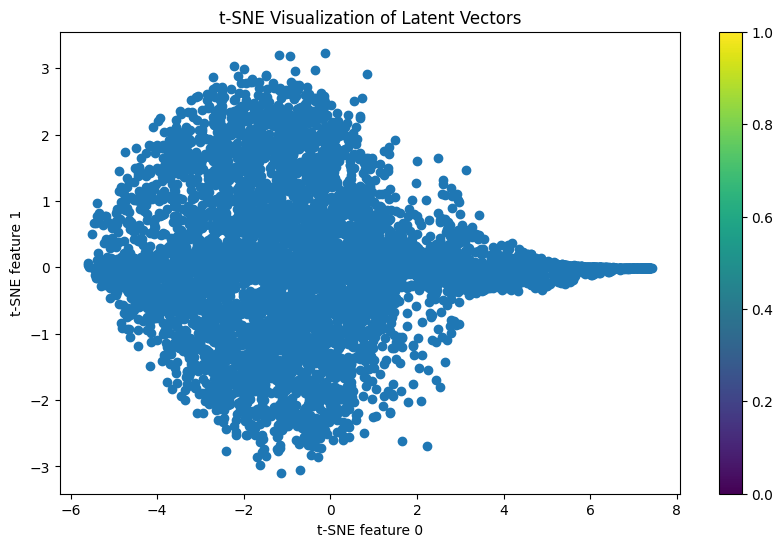

In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming latent_vector is your tensor of shape (128, 128)
 # Make sure it's a numpy array


# Initialize t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(latent_vector_total)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.colorbar()
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.title('t-SNE Visualization of Latent Vectors')
plt.show()